In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from pandas_profiling import ProfileReport as pr

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import dtale as dtl

In [3]:
#Load the train and test data
train_ds = pd.read_csv(r'C:\Users\Madhan Adavani\Desktop\Loan prediction\train_ds.csv')
test_ds = pd.read_csv(r'C:\Users\Madhan Adavani\Desktop\Loan prediction\test_ds.csv')

In [4]:
#First 10 rows of train dataset
train_ds.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
train_ds.shape

(614, 13)

#EDA Report using Pandas_Profiling library
loan_pred_eda = pr(train_ds,title='EDA Report',explorative=True)
loan_pred_eda.to_widgets()

In [6]:
train = train_ds.copy()

# Missing Values - Gender

In [7]:
train[train['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [8]:
a = train[train['Married'] == 'Yes']
a.shape

(398, 13)

In [9]:
a.groupby('Gender').count() 

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,31,31,31,31,29,31,31,31,31,27,31,31
Male,357,357,349,357,341,357,357,343,348,326,357,357


In [10]:
train.groupby('Gender').count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,112,111,109,112,104,112,112,109,109,101,112,112
Male,489,487,477,489,465,489,489,470,478,451,489,489


In [11]:
#Fill missing Gender values with 'Male' if Married == 'Yes' else 'Female'
temp = train[train['Gender'].isnull()]
train.loc[temp.index,'Gender'] = np.where(temp['Married']=='Yes','Male','Female')

# Missing values - Married

In [12]:
train[train['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [13]:
a2 = train[train['CoapplicantIncome'] == 0]
a2.groupby('Married')['CoapplicantIncome'].count()

Married
No     143
Yes    128
Name: CoapplicantIncome, dtype: int64

In [14]:
train.groupby('Married')['CoapplicantIncome'].count()

Married
No     213
Yes    398
Name: CoapplicantIncome, dtype: int64

In [15]:
#Fill missing Married values with 'No' if CoapplicantIncome == 0 else 'Yes'
temp = train[train['Married'].isnull()]
train.loc[temp.index,'Married'] = np.where(temp['CoapplicantIncome'] == 0,'No','Yes')

# Missing Values - Dependents

In [16]:
temp = train[train['Dependents'].isnull()]
temp

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,No,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [17]:
a = train[train['Married'] == 'No']
a.groupby('Dependents').count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,
0,171,171,171,171,162,171,171,166,166,162,171,171
1,23,23,23,23,20,23,23,22,23,19,23,23
2,8,8,8,8,7,8,8,8,8,8,8,8
3+,7,7,7,7,6,7,7,6,7,6,7,7


In [18]:
a3 = train[train['Gender'] == 'Male']
a3.groupby('Dependents').count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,
0,263,263,263,263,247,263,263,252,255,242,263,263
1,83,83,83,83,79,83,83,80,82,72,83,83
2,94,94,94,94,91,94,94,91,94,89,94,94
3+,47,47,47,47,46,47,47,46,46,45,47,47


In [19]:
train.groupby('Dependents').count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,
0,345,345,345,345,326,345,345,334,334,316,345,345
1,102,102,102,102,96,102,102,98,101,90,102,102
2,101,101,101,101,96,101,101,98,101,95,101,101
3+,51,51,51,51,49,51,51,49,50,48,51,51


In [20]:
#Fill missing Dependents values with 0
train.loc[temp.index,'Dependents'] = '0'
train.loc[temp.index,:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,0,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,0,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,No,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,0,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,0,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,0,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,0,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,0,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


# Missing values - Self_Employed|

In [21]:
train[train['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [22]:
train[train['Education'] == 'Graduate'].groupby('Self_Employed').count()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,,,,,,,,,,,,
No,389,389,389,389,389,389,389,378,383,363,389,389
Yes,65,65,65,65,65,65,65,62,64,60,65,65


In [23]:
train.groupby('Self_Employed').count()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Self_Employed,,,,,,,,,,,,
No,500,500,500,500,500,500,500,482,489,463,500,500
Yes,82,82,82,82,82,82,82,79,80,75,82,82


In [24]:
pd.crosstab(train['Self_Employed'],train['Education'],margins = False)

Education,Graduate,Not Graduate
Self_Employed,,
No,389,111
Yes,65,17


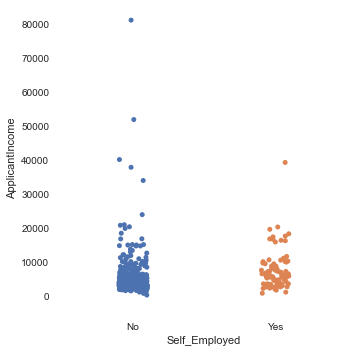

In [25]:
sns.catplot(x='Self_Employed', y='ApplicantIncome', data=train);

In [26]:
#Fill missing Self_Employed values with 'No'
temp = train[train['Self_Employed'].isnull()]
train.loc[temp.index,'Self_Employed'] = 'No'
train.loc[temp.index,:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,LP001027,Male,Yes,2,Graduate,No,2500,1840.0,109.0,360.0,1.0,Urban,Y
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,No,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
107,LP001370,Male,No,0,Not Graduate,No,7333,0.0,120.0,360.0,1.0,Rural,N
111,LP001387,Female,Yes,0,Graduate,No,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
114,LP001398,Male,No,0,Graduate,No,5050,0.0,118.0,360.0,1.0,Semiurban,Y
158,LP001546,Male,No,0,Graduate,No,2980,2083.0,120.0,360.0,1.0,Rural,Y


In [27]:
train[train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,NaN,Urban,N
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


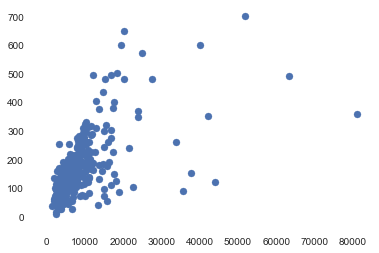

In [28]:
plt.scatter(train['ApplicantIncome']+train['CoapplicantIncome'],train['LoanAmount'])

In [29]:
a = train[ (train['ApplicantIncome']+train['CoapplicantIncome']) > 0 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 5000]
m1 = b['LoanAmount'].median()

a = train[ (train['ApplicantIncome']+train['CoapplicantIncome']) > 5000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 10000]
m2 = b['LoanAmount'].median()

a = train[ (train['ApplicantIncome']+train['CoapplicantIncome']) > 10000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 20000]
m3 = b['LoanAmount'].median()

a = train[ (train['ApplicantIncome']+train['CoapplicantIncome']) > 20000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 30000]
m4 = b['LoanAmount'].median()

a = train[ (train['ApplicantIncome']+train['CoapplicantIncome']) > 30000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 50000]
m5 = b['LoanAmount'].median()

a = train[ (train['ApplicantIncome']+train['CoapplicantIncome']) > 50000 ]
m6 = a['LoanAmount'].median()

In [30]:
#Fill missing 'LoanAmount' values
temp = train[train['LoanAmount'].isnull()]

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 0 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 5000]
train.loc[b.index,'LoanAmount'] = m1

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 5000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 10000]
train.loc[b.index,'LoanAmount'] = m2

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 10000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 20000]
train.loc[b.index,'LoanAmount'] = m3

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 20000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 30000]
train.loc[b.index,'LoanAmount'] = m4

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 30000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 50000]
train.loc[b.index,'LoanAmount'] = m5

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 50000 ]
train.loc[a.index,'LoanAmount'] = m6

In [31]:
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,148.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [32]:
train[train['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [33]:
train.groupby('Loan_Amount_Term').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
Loan_Amount_Term,,,,,,,,,,,,
12.0,1,1,1,1,1,1,1,1,1,0,1,1
36.0,2,2,2,2,2,2,2,2,2,2,2,2
60.0,2,2,2,2,2,2,2,2,2,2,2,2
84.0,4,4,4,4,4,4,4,4,4,3,4,4
120.0,3,3,3,3,3,3,3,3,3,3,3,3
180.0,44,44,44,44,44,44,44,44,44,43,44,44
240.0,4,4,4,4,4,4,4,4,4,3,4,4
300.0,13,13,13,13,13,13,13,13,13,10,13,13
360.0,512,512,512,512,512,512,512,512,512,470,512,512


In [34]:
#Fill missing 'Loan_Amount_Term' values with 360
temp = train[train['Loan_Amount_Term'].isnull()]
train.loc[temp.index,'Loan_Amount_Term'] = 360.0
train.loc[temp.index,:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,360.0,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,360.0,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,360.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,360.0,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,360.0,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,360.0,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,360.0,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,360.0,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,360.0,1.0,Rural,Y


In [35]:
train[train['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,148.0,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [36]:
train.groupby('Credit_History').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
Credit_History,,,,,,,,,,,,
0.0,89,89,89,89,89,89,89,89,89,89,89,89
1.0,475,475,475,475,475,475,475,475,475,475,475,475


In [37]:
#Fill missing 'Credit_History' values with 1
temp = train[train['Credit_History'].isnull()]
train.loc[temp.index,'Credit_History'] = 1
train.loc[temp.index,:]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,1.0,Urban,Y
24,LP001052,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360.0,1.0,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,1.0,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,1.0,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,1.0,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,148.0,360.0,1.0,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,1.0,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,1.0,Rural,Y


In [38]:
#check for missing values
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Feature Engineering

In [39]:
train.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,148.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [40]:
train_eda = train.copy()

In [41]:
#Gender
train_eda.loc[:,'Gender'] = np.where(train_eda['Gender'] == 'Male', 1 , 0)

In [42]:
#Married
train_eda.loc[:,'Married'] = np.where(train_eda['Married'] == 'Yes', 1 , 0)

In [43]:
#Dependents(Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_eda['Dependents'] = le.fit_transform(train_eda['Dependents'])

In [44]:
#Education
train_eda.loc[:,'Education'] = np.where(train_eda['Education'] == 'Graduate', 1 , 0)

In [45]:
#Self_Employed
train_eda.loc[:,'Self_Employed'] = np.where(train_eda['Self_Employed'] == 'Yes', 1 , 0)

In [46]:
#Property_Area(One Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
prop = pd.DataFrame(ohe.fit_transform(train_eda[['Property_Area']]))

In [47]:
prop.index = train_eda.index
train_eda_2 = pd.concat([train_eda,prop],axis=1)

In [48]:
#Loan_Status
train_eda_2['Loan_Status'] = np.where(train_eda['Loan_Status'] == 'Y', 1, 0)

In [49]:
train_eda_2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0,1,2
0,LP001002,1,0,0,1,0,5849,0.0,148.0,360.0,1.0,Urban,1,0.0,0.0,1.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1.0,0.0,0.0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0.0,0.0,1.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0.0,0.0,1.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0.0,0.0,1.0
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1,0.0,0.0,1.0
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,1,0.0,0.0,1.0
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0,0.0,1.0,0.0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,Urban,1,0.0,0.0,1.0
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0,0.0,1.0,0.0


In [50]:
train_2 = train_eda_2.rename(columns={0:'Rural_Area',1:'Semiurban_Area',2:'Urban_Area'})

In [51]:
rem_cols = ['Loan_ID','Property_Area','Semiurban_Area']
train_2 = train_2.drop(rem_cols,axis=1)

In [52]:
train_y = train_2['Loan_Status'].copy()
train_3 = train_2.drop(['Loan_Status'],axis=1)

In [53]:
train_x = train_3.copy()

# Test Data

In [54]:
test_ds.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [55]:
test = test_ds.copy()

In [56]:
#Test data missing values

#Fill missing Gender values with 'Male' if Married == 'Yes' else 'Female'
temp = test[test['Gender'].isnull()]
test.loc[temp.index,'Gender'] = np.where(temp['Married']=='Yes','Male','Female')

#Fill missing Married values with 'No' if CoapplicantIncome == 0 else 'Yes'
temp = test[test['Married'].isnull()]
test.loc[temp.index,'Married'] = np.where(temp['CoapplicantIncome'] == 0,'No','Yes')

#Fill missing Dependents values with 0
temp = test[test['Dependents'].isnull()]
test.loc[temp.index,'Dependents'] = '0'

#Fill missing Self_Employed values with 'No'
temp = test[test['Self_Employed'].isnull()]
test.loc[temp.index,'Self_Employed'] = 'No'

#Fill missing 'LoanAmount' values
temp = test[test['LoanAmount'].isnull()]

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 0 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 5000]
test.loc[b.index,'LoanAmount'] = m1

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 5000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 10000]
test.loc[b.index,'LoanAmount'] = m2

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 10000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 20000]
test.loc[b.index,'LoanAmount'] = m3

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 20000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 30000]
test.loc[b.index,'LoanAmount'] = m4

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 30000 ]
b = a[ (a['ApplicantIncome']+a['CoapplicantIncome']) < 50000]
test.loc[b.index,'LoanAmount'] = m5

a = temp[ (temp['ApplicantIncome']+temp['CoapplicantIncome']) > 50000 ]
test.loc[a.index,'LoanAmount'] = m6

#Fill missing 'Loan_Amount_Term' values with 360
temp = test[test['Loan_Amount_Term'].isnull()]
test.loc[temp.index,'Loan_Amount_Term'] = 360.0

#Fill missing 'Credit_History' values with 1
temp = test[test['Credit_History'].isnull()]
test.loc[temp.index,'Credit_History'] = 1

In [57]:
test_eda = test.copy()

In [58]:
#Test data Feature Engineering

#Gender
test_eda.loc[:,'Gender'] = np.where(test_eda['Gender'] == 'Male', 1 , 0)

#Married
test_eda.loc[:,'Married'] = np.where(test_eda['Married'] == 'Yes', 1 , 0)

#Dependents(Label Encoding)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_eda['Dependents'] = le.fit_transform(test_eda['Dependents'])

#Education
test_eda.loc[:,'Education'] = np.where(test_eda['Education'] == 'Graduate', 1 , 0)

#Self_Employed
test_eda.loc[:,'Self_Employed'] = np.where(test_eda['Self_Employed'] == 'Yes', 1 , 0)

#Property_Area(One Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
prop_t = pd.DataFrame(ohe.fit_transform(test_eda[['Property_Area']]))
prop_t.index = test_eda.index
test_eda_2 = pd.concat([test_eda,prop_t],axis=1)

In [59]:
test_eda_2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0,1,2
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban,0.0,0.0,1.0
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban,0.0,0.0,1.0
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban,0.0,0.0,1.0
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,Urban,0.0,0.0,1.0
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,Urban,0.0,0.0,1.0
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,Urban,0.0,0.0,1.0
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,Semiurban,0.0,1.0,0.0
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,Rural,1.0,0.0,0.0


In [60]:
test_2 = test_eda_2.rename(columns={0:'Rural_Area',1:'Semiurban_Area',2:'Urban_Area'})
rem_cols = ['Loan_ID','Property_Area','Semiurban_Area']
test_3 = test_2.drop(rem_cols,axis=1)

In [61]:
test_x = test_3.copy()

In [62]:
test_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural_Area,Urban_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,0.0,1.0
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0.0,1.0
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0.0,1.0
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,0.0,1.0
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777,113.0,360.0,1.0,0.0,1.0
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,0.0,1.0
364,1,0,0,1,0,3250,1993,126.0,360.0,1.0,0.0,0.0
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,1.0,0.0


# Training and Prediction

In [74]:
from xgboost import XGBClassifier
my_model = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(train_x, train_y,  
             verbose=False)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [75]:
pred = my_model.predict(test_x)

In [76]:
pred_2 = np.where(pred==1,'Y','N')

In [77]:
loan_id = test_ds['Loan_ID']
loan_id

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [78]:
df = {'Loan_Status' : pd.Series(pred_2, index = loan_id)}
submissions = pd.DataFrame(df)
submissions

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,N
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [79]:
submissions.to_csv('loan_pred_soln.csv')